#### Comprehensive Breast Cancer Analysis and Prediction

In [10]:
import pandas as pd 

# Reading files to form data frames 
df1 = pd.read_excel('death.xlsx')
df2 = pd.read_excel('recovered.xlsx')
df3 = pd.read_excel('under treatment.xlsx')

# Concatenating the data frames(stacking them vertically)
merged_df = pd.concat([df1, df2, df3])

# Printing the data after merging
print(merged_df)

       patient_id  gender   education  treatment_data  id_healthcenter  \
0    111036008041        0          4            2019       1110000256   
1    111035996130        0          6            2019       1110000316   
2    111035971333        0          5            2019       1110000288   
3    111036018485        0          5            2019       1110000042   
4    111035985474        0          1            2019       1110000116   
..            ...      ...        ...             ...              ...   
345  111038139813        1          0            2019       1110000224   
346  111038120692        1          1            2019       1110000244   
347  111038141274        1          7            2019       1110000018   
348  111038127684        1          5            2019       1110000262   
349  111038175873        1          3            2019       1110000303   

     id_treatment_region  hereditary_history birth_date  age  weight  ...  \
0             1110000329          

In [11]:
# Dropping columns (id_healthcenter and id_treatment_region are removed from the final dataframe)
final_df = merged_df.drop(columns=['id_healthcenter', 'id_treatment_region'])
print(final_df)

       patient_id  gender   education  treatment_data  hereditary_history  \
0    111036008041        0          4            2019                   1   
1    111035996130        0          6            2019                   0   
2    111035971333        0          5            2019                   0   
3    111036018485        0          5            2019                   1   
4    111035985474        0          1            2019                   0   
..            ...      ...        ...             ...                 ...   
345  111038139813        1          0            2019                   1   
346  111038120692        1          1            2019                   0   
347  111038141274        1          7            2019                   1   
348  111038127684        1          5            2019                   1   
349  111038175873        1          3            2019                   1   

    birth_date  age  weight  thickness_tumor  marital_status  ...  \
0     

In [12]:
# Dowloading the final data frame as csv file
final_df.to_csv('BC_final_data.csv', index=False)

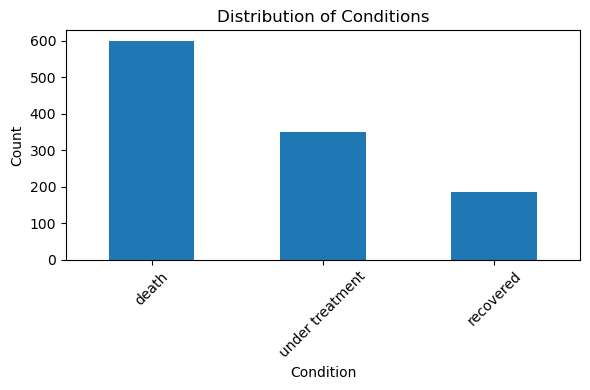

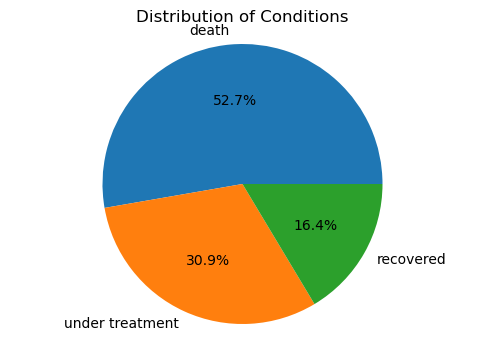

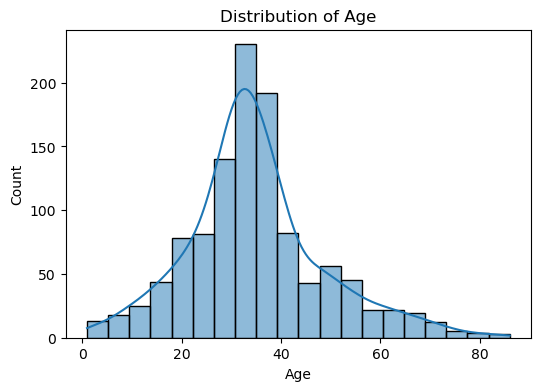

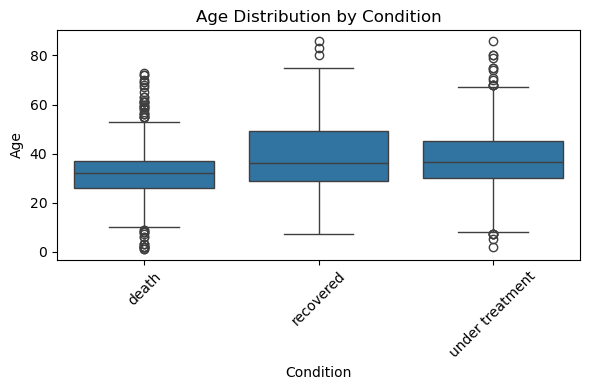

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar chart for condition distribution
condition_counts = final_df['condition'].value_counts()
plt.figure(figsize=(6, 4))
condition_counts.plot(kind='bar')
plt.title('Distribution of Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for condition distribution
plt.figure(figsize=(6, 4))
plt.pie(condition_counts.values, labels=condition_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Conditions')
plt.axis('equal')
plt.show

# Histogram for age distribution
plt.figure(figsize=(6, 4))
sns.histplot(final_df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Box plot for age distribution by condition
plt.figure(figsize=(6, 4))
sns.boxplot(x='condition', y='age', data=final_df)
plt.title('Age Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

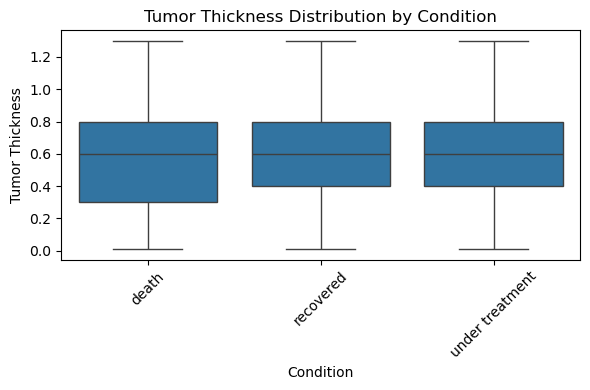

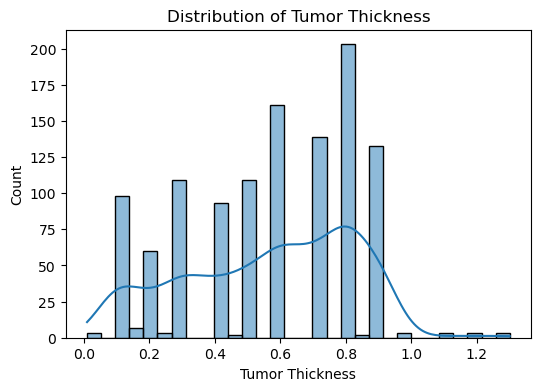

In [14]:
# Box plot for tumor thickness distribution by condition
plt.figure(figsize=(6, 4))
sns.boxplot(x='condition', y='thickness_tumor', data=final_df)
plt.title('Tumor Thickness Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Tumor Thickness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram for tumor thickness distribution
plt.figure(figsize=(6, 4))
sns.histplot(final_df['thickness_tumor'], bins=30, kde=True)
plt.title('Distribution of Tumor Thickness')
plt.xlabel('Tumor Thickness')
plt.ylabel('Count')
plt.show()

C:\Users\mirza\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\mirza\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\mirza\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\mirza\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:121: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


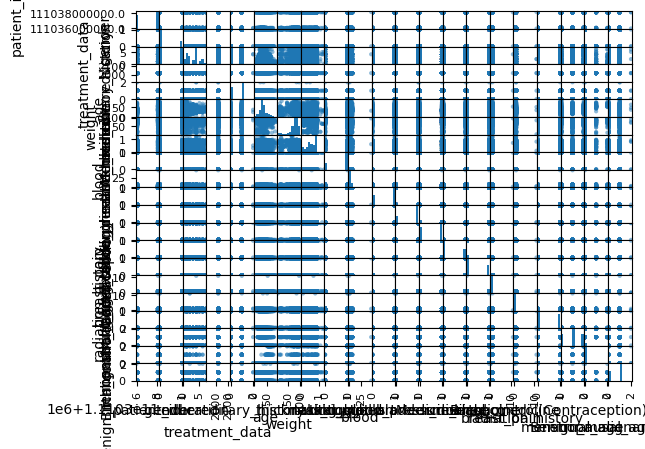

ValueError: cannot reindex on an axis with duplicate labels

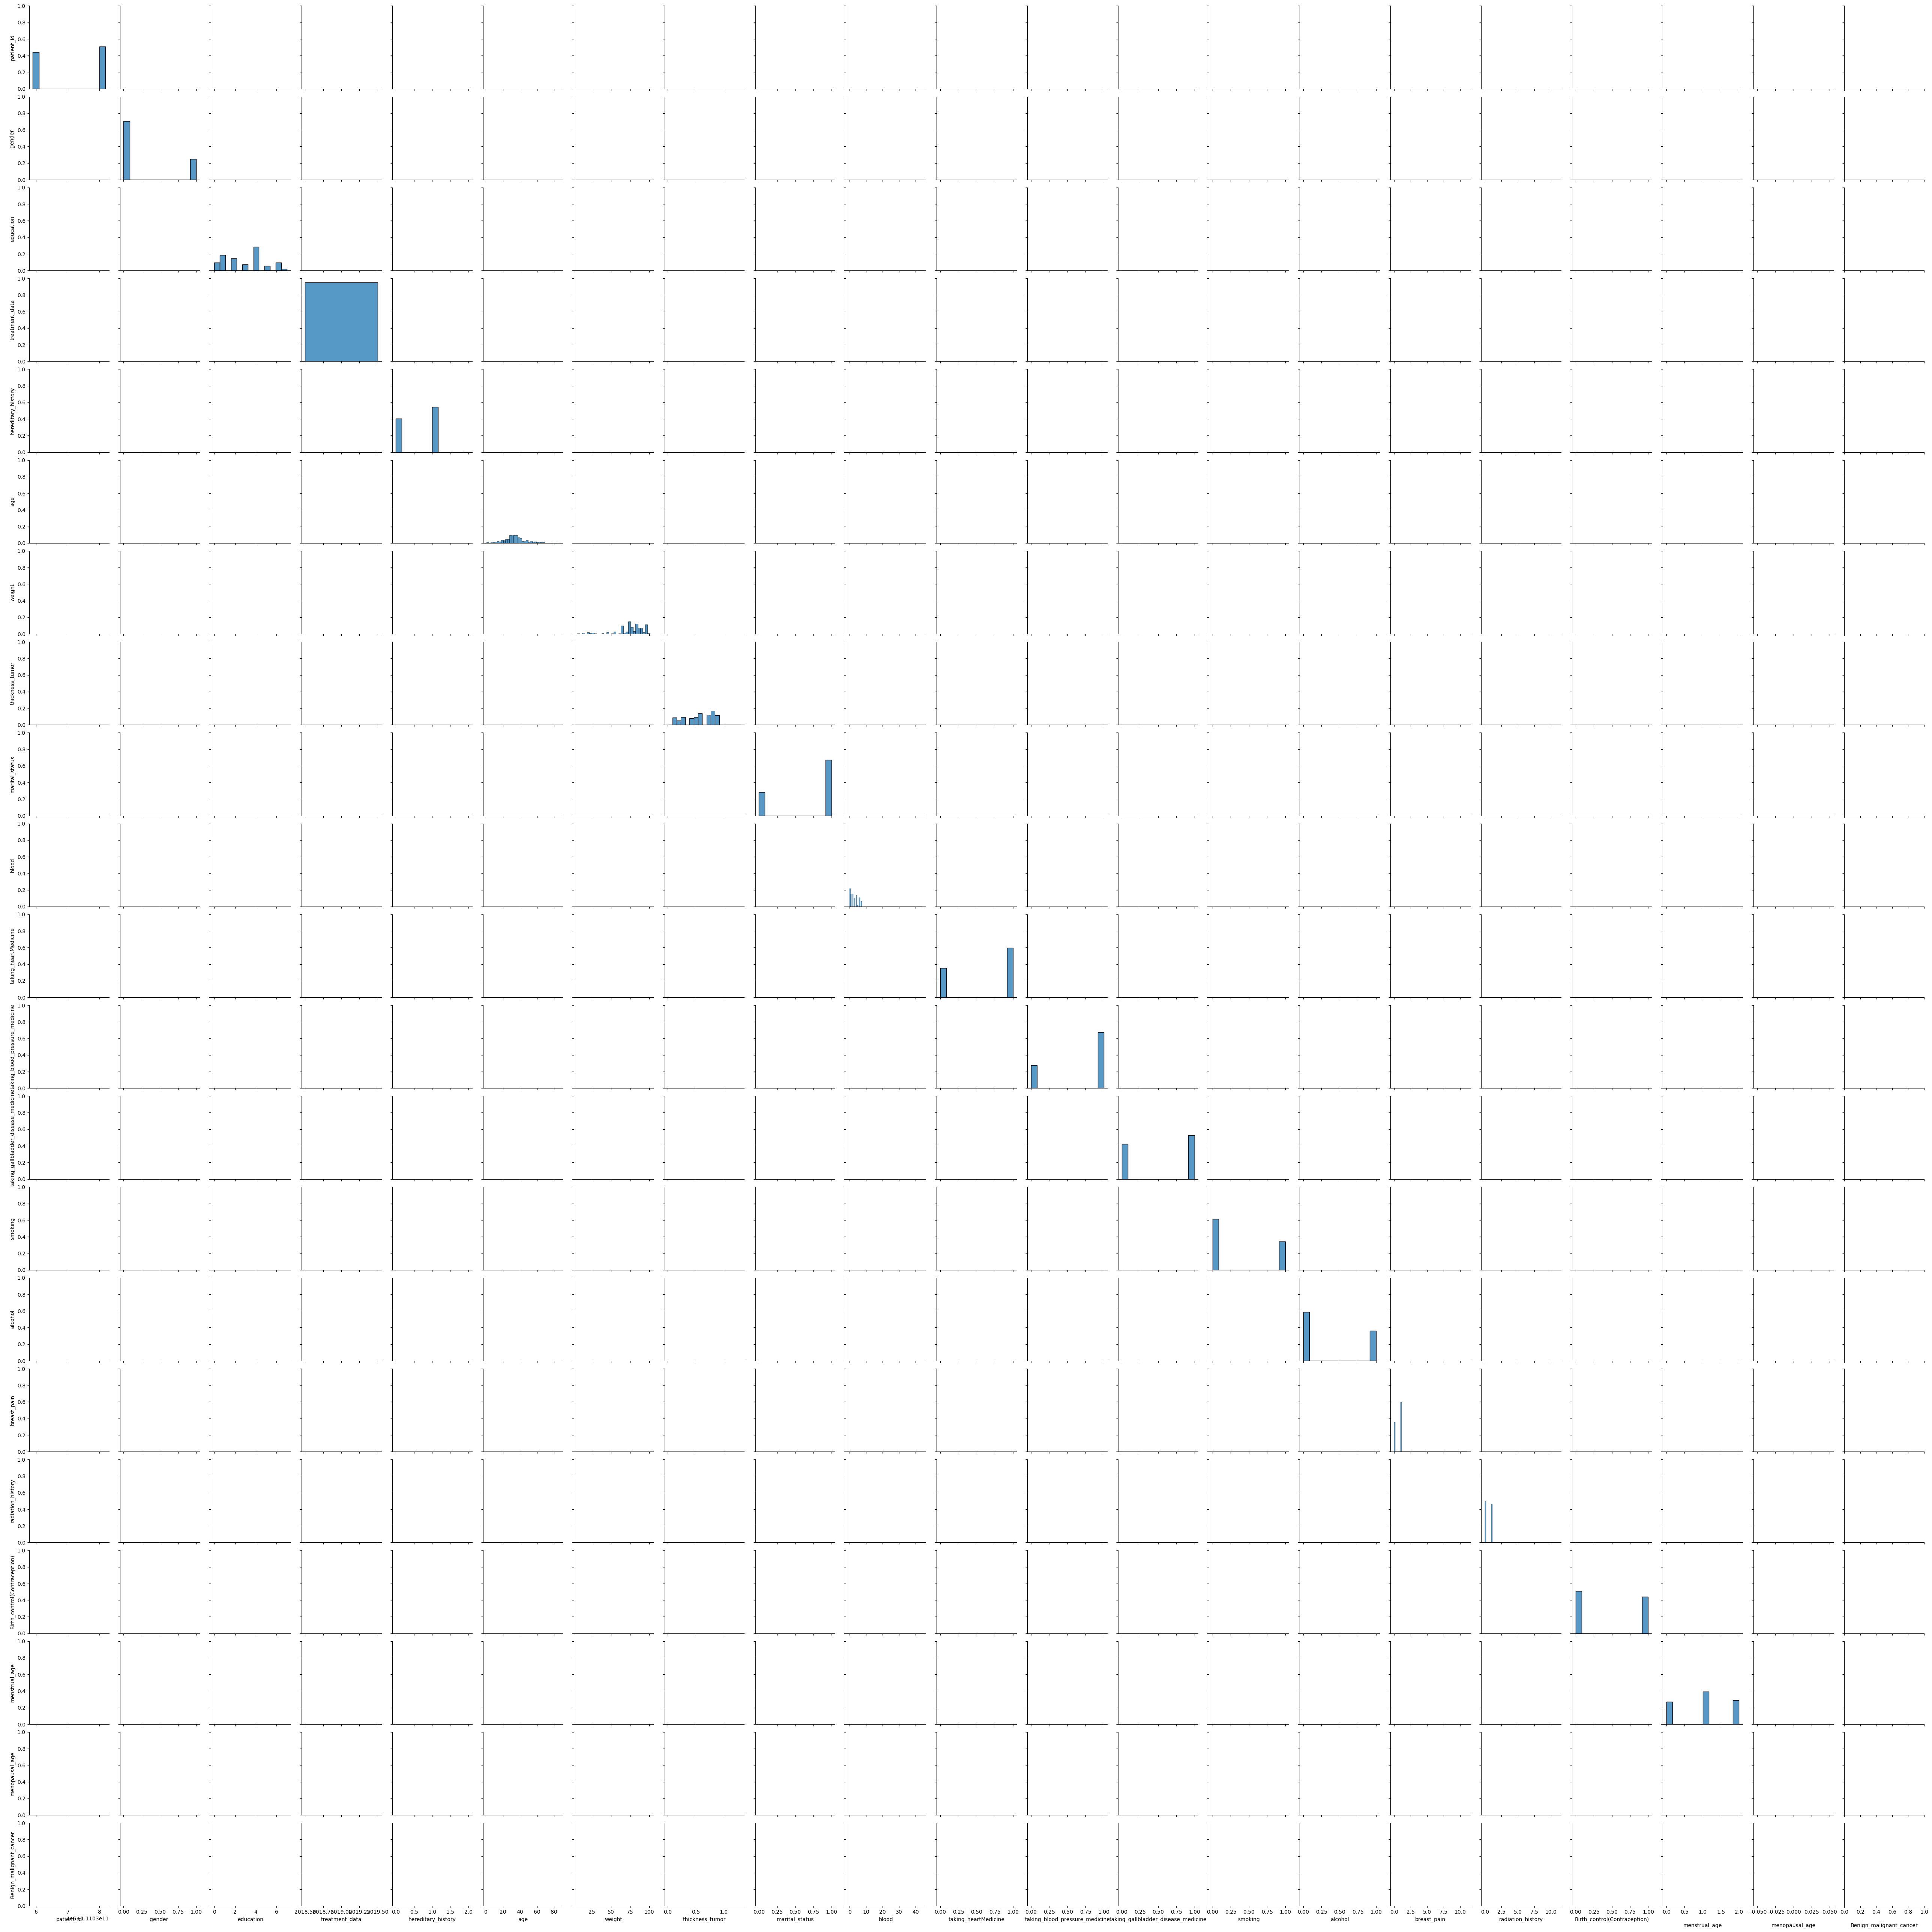

In [15]:
import pandas as pd
pd.plotting.scatter_matrix(final_df)   
plt.show()

import seaborn as sns
sns.pairplot(final_df)
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear',C=10,random_state=0)
X = final_df[['age']]
y = final_df['condition']
model.fit(X,y)
# find the logistic probabilities
p_pred=model.predict_proba(X)  # predict probabilities
y_pred=model.predict(X)        # predict the classes of each value
p_pred

array([[0.57304571, 0.14459435, 0.28235994],
       [0.57304571, 0.14459435, 0.28235994],
       [0.57304571, 0.14459435, 0.28235994],
       ...,
       [0.41155504, 0.20952127, 0.37892369],
       [0.52138519, 0.16470082, 0.31391399],
       [0.4393903 , 0.19786706, 0.36274264]])

In [20]:
scor=model.score(X,y)  # model accuracy
print(scor)
conf_m=confusion_matrix(y,y_pred)
conf_m

0.5458553791887125


array([[559,   0,  39],
       [145,   0,  41],
       [290,   0,  60]], dtype=int64)

In [22]:
print(classification_report(y,model.predict(X)))

                 precision    recall  f1-score   support

          death       0.56      0.93      0.70       598
      recovered       0.00      0.00      0.00       186
under treatment       0.43      0.17      0.24       350

       accuracy                           0.55      1134
      macro avg       0.33      0.37      0.32      1134
   weighted avg       0.43      0.55      0.45      1134



C:\Users\mirza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mirza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mirza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
#linear regression for tumor thickness and hereditary hitory
from sklearn.linear_model import LinearRegression

X = final_df[['hereditary_history']]
y = final_df['thickness_tumor']


# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
intercept = model.intercept_
coefficients = model.coef_[0]

# Printing the linear regression equation
print(f"The linear regression equation is: tumor thickness  = {intercept:.2f} + {coefficients:.2f} * hereditary history ")

The linear regression equation is: tumor thickness  = 0.55 + 0.02 * hereditary history 


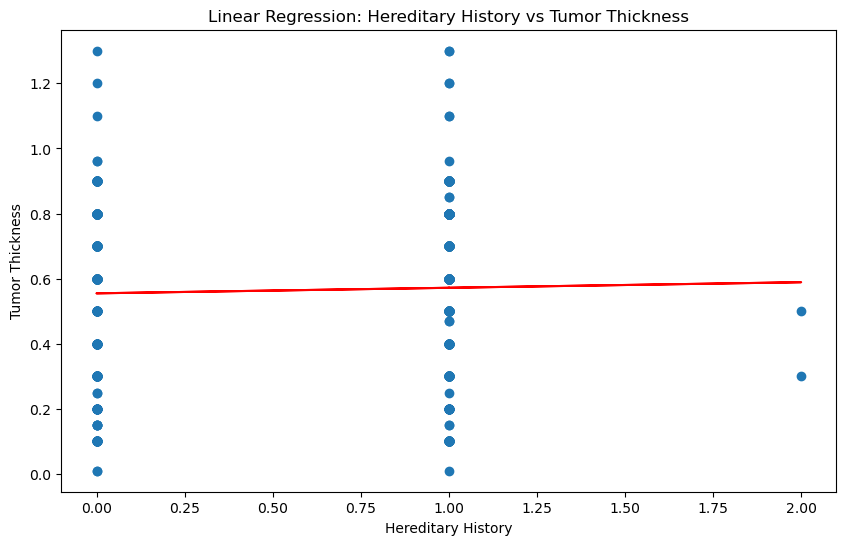

In [28]:
#linear regression plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression: Hereditary History vs Tumor Thickness')
plt.xlabel('Hereditary History')
plt.ylabel('Tumor Thickness')
plt.show()

In [30]:
#linear regression for tumor thickness and weight
from sklearn.linear_model import LinearRegression

X = final_df[['weight']]
y = final_df['thickness_tumor']


# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Printing the linear regression equation
print(f"The linear regression equation is: tumor thickness  = {intercept:.2f} + {slope:.2f} * weight")

The linear regression equation is: tumor thickness  = 0.61 + -0.00 * weight


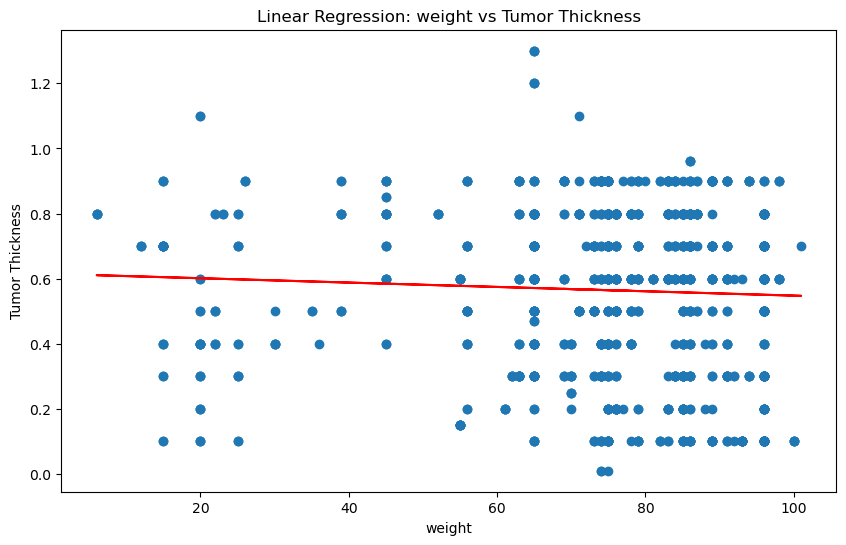

In [32]:
#linear plot for weight and tumor thickness
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression: weight vs Tumor Thickness')
plt.xlabel('weight')
plt.ylabel('Tumor Thickness')
plt.show()

In [34]:
#linear regression for tumor thickness and age
from sklearn.linear_model import LinearRegression

X = final_df[['age']]
y = final_df['thickness_tumor']


# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Printing the linear regression equation
print(f"The linear regression equation is: tumor thickness  = {intercept:.2f} + {slope:.2f} * age")

The linear regression equation is: tumor thickness  = 0.56 + 0.00 * age


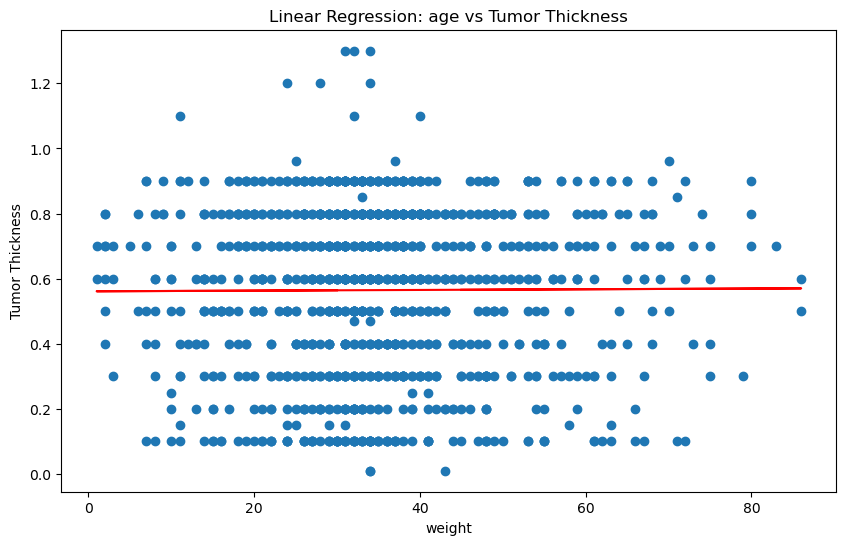

In [36]:
#linear plot for age and tumor thickness
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression: age vs Tumor Thickness')
plt.xlabel('weight')
plt.ylabel('Tumor Thickness')
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear',C=10,random_state=0)
X = final_df[['hereditary_history']]
y = final_df['condition']
model.fit(X,y)
# find the logistic probabilities
p_pred=model.predict_proba(X)  # predict probabilities
y_pred=model.predict(X)        # predict the classes of each value
p_pred

array([[0.53580152, 0.13625094, 0.32794754],
       [0.51555929, 0.20211663, 0.28232408],
       [0.51555929, 0.20211663, 0.28232408],
       ...,
       [0.53580152, 0.13625094, 0.32794754],
       [0.53580152, 0.13625094, 0.32794754],
       [0.53580152, 0.13625094, 0.32794754]])

In [40]:
scor=model.score(X,y)  # model accuracy
print(scor)
conf_m=confusion_matrix(y,y_pred)
conf_m

0.527336860670194


array([[598,   0,   0],
       [186,   0,   0],
       [350,   0,   0]], dtype=int64)

#### KNN AND NB MODEL

In [181]:
x=final_df[["age","thickness_tumor"]]  
y=final_df["condition"]

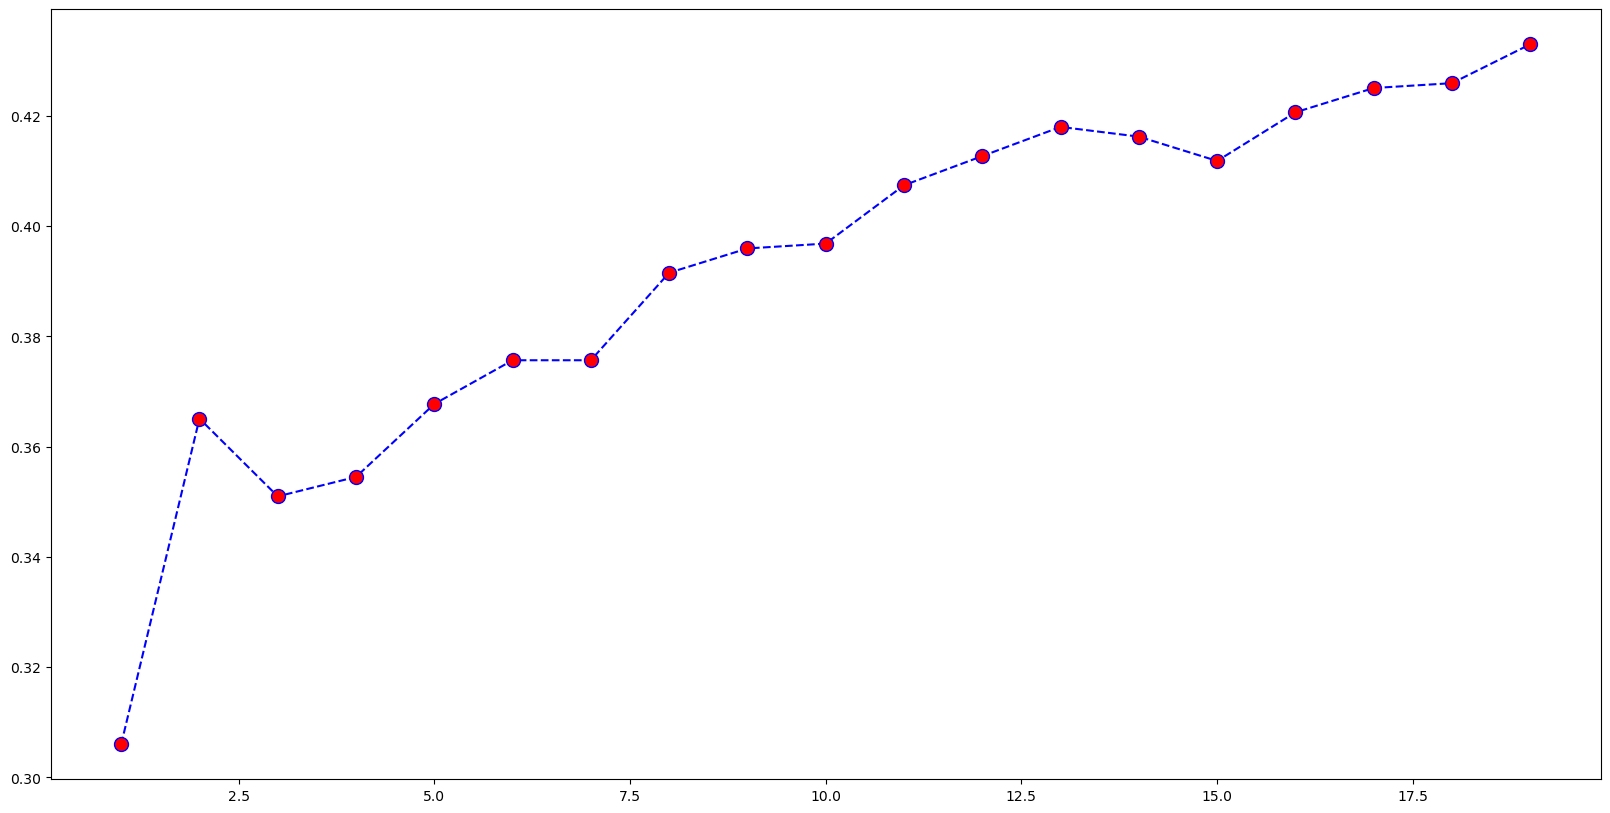

In [183]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
SSE=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    pred_i=knn.predict(x)
    SSE.append(np.mean(pred_i != y))
plt.figure(figsize=(20,10))
plt.plot(range(1,20),SSE,color='b',linestyle='dashed',marker='o',markerfacecolor='r',markersize=10)
plt.show()

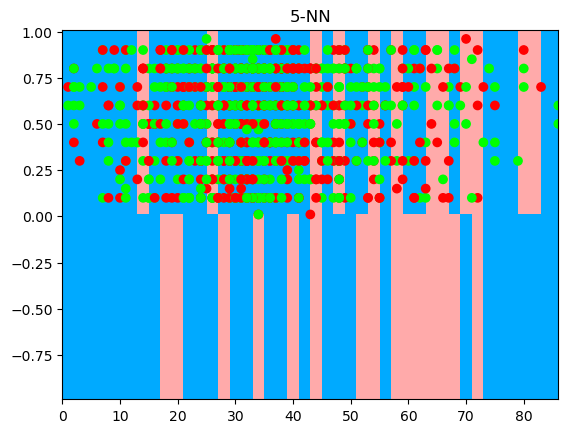

In [185]:
#make knn graph k=5
from matplotlib.colors import ListedColormap
n_neighbors=5
x=final_df[["age","thickness_tumor"]]  
y=final_df["hereditary_history"]
X=x.values[:,0:2]
h=2
clf=KNeighborsClassifier(n_neighbors,weights='distance')
clf.fit(X,y)
x_min, x_max=X[:,0].min()-1, X[:,0].max()+1  # x axis DMC
y_min, y_max=X[:,1].min()-1, X[:,1].max()+1  # y axis wind
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) # grids
cmap_l =ListedColormap(['#FFAAAA','#AAFFAA','#00AAFF']) # predicted
cmap_d =ListedColormap(['#FF0000','#00FF00','#AA00FF']) # actual

Z= clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_l) # predicted values on back
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_d) # actual values
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("5-NN")
plt.show()

In [187]:
#accuracy for KNN model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_accuracy = clf.score(X_train, y_train) 
test_accuracy = clf.score(X_test, y_test) 
print(train_accuracy)
print(test_accuracy)

0.7574421168687983
0.6740088105726872


### Gausian method 

In [189]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

clf=GaussianNB()
clf.fit(X_train,y_train)
#Accuracy 
train_accuracy = clf.score(x_train, y_train) 
test_accuracy = clf.score(x_test, y_test) 
print(train_accuracy)
print(test_accuracy)

0.565600882028666
0.5638766519823789


C:\Users\mirza\AppData\Local\Temp\ipykernel_30144\2851177447.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='x', s=100, label='Train Data')


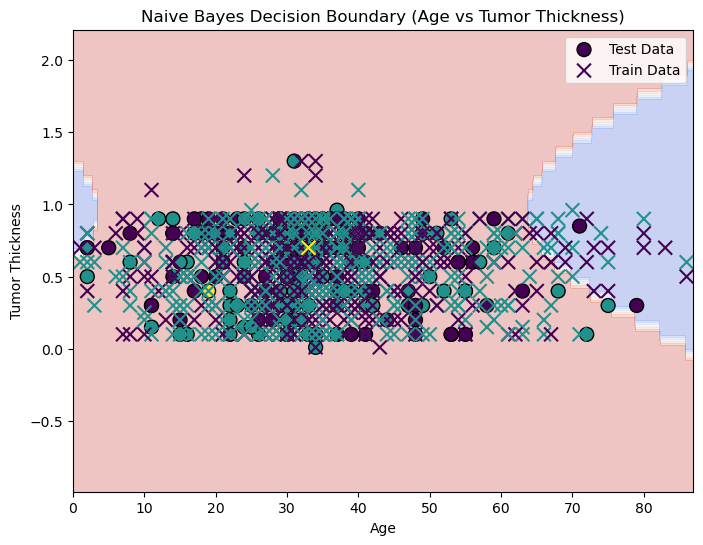

In [191]:
# Define the meshgrid for plotting using NumPy indexing
x=final_df[["age","thickness_tumor"]]  
y=final_df["hereditary_history"]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict over the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training and test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o', s=100, label='Test Data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='x', s=100, label='Train Data')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Tumor Thickness")
plt.title("Naive Bayes Decision Boundary (Age vs Tumor Thickness)")
plt.legend()
plt.show()


C:\Users\mirza\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


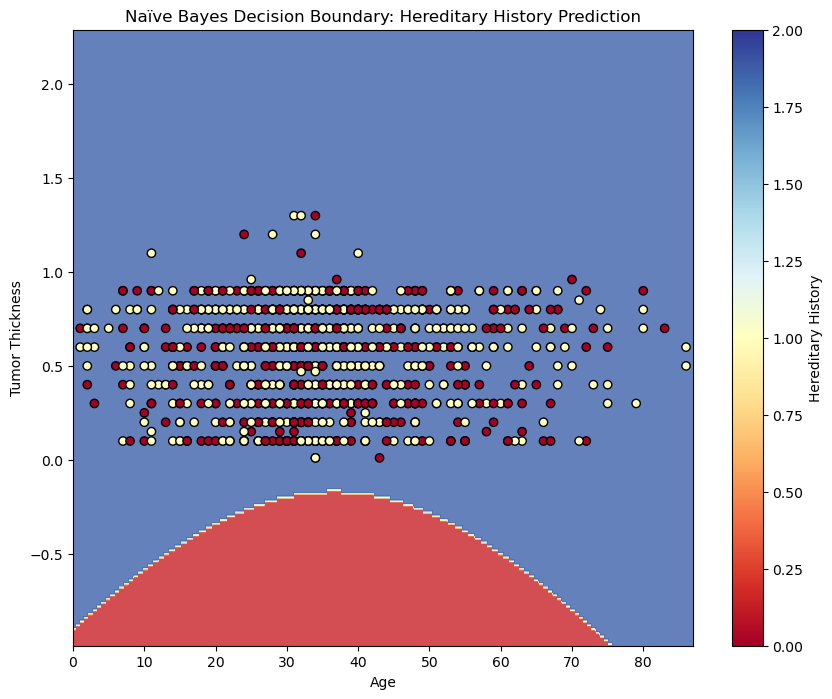

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming final_df is your DataFrame
X = final_df[["age", "thickness_tumor"]]
y = final_df["hereditary_history"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Create a mesh grid
x_min, x_max = X["age"].min() - 1, X["age"].max() + 1
y_min, y_max = X["thickness_tumor"].min() - 1, X["thickness_tumor"].max() + 1

# Define step size for the mesh
step_size = 0.02

# Create the meshgrid with the defined step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

# Rest of the code remains the same
Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X["age"], X["thickness_tumor"], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Tumor Thickness')
plt.title('Naïve Bayes Decision Boundary: Hereditary History Prediction')
plt.colorbar(label='Hereditary History')
plt.show()